## Pergunta: Coloque um cabeçalho nesse notebook com o seu nome e resumindo o que descobriu ao explorar esses dados

## Nome: Luan Luna Coelho Gomes
## Sobre o processo de exploração dos dados:
### As vizualizações podem nos dar indícios de relações entre variáveis, podem nos dar idéias serem colocadas em prática e hipóteses a serem testadas. São, muitas vezes, como pistas para um detetive. Após essa etapa, devemos lançar mão de ferramentas mais precisas e embasadas em conceitos científicos, para que possamos chegar a conclusões confiáveis e que possam ter aplicação prática.
### Há casos nos quais, mesmo sem causalidade, ocorrem correlações de graus significativos entre variáveis. Tais casos devem ser analisados com mais atenção, pois podem carregar informações importantes ou armadilhas.
### Vizualisações como histogramas cumulativos podem ser muito úteis para a formação de uma visão geral dos dados.

## Sobre os dados: 
### (conclusões válidas para filmes com mais de 50 votos)
### Através da análise desse dataset podemos notar que os filmes tendem a receber notas mais próximas da nota máxima, por exemplo, a mediana das notas médias dos filmes é: 3.75, ou seja 50% dos filmes possui notas maiores do que esta. Ainda corroborando com essa constatação temos que 90% dos filmes possuem nota média acima de 3.1. Esse fato nos mostra que a distribuição das notas médias não é uma Normal e que há uma assimetria à esquerda.
### Com base nos dados de notas médias e quantidade de votos podemos escolher um gênero específico para criação de um filme com objetivos bem definidos.
### A quantidade de votos de um gênero se deve mais à quantidade de filmes desse gênero do que à qualidade desses filmes. O coeficiente de Pearson para esta correlação é de 0.995.
###  Valores relativos nos dão uma visão mais precisa sobre as reais diferenças entre os gêneros e filmes analisados.
### Nem sempre as relações entre variáveis, quando existem, são lineares, porém as retas de regressão podem nos dar uma visão geral muito útil sobre o que ocorre nos dados.
### Embora a grande maioria dos filmes receba notas mais próximas da nota máxima, ainda há filmes que se destacam e conseguem se diferenciar dos demais.

## Formação Data Science Alura - Análise exploratória do MovieLens

Na formação de Data Scienda www.alura.com.br um dos conjuntos de dados que utilizamos é o de avaliações para filmes no site MovieLens. Neste projeto faremos uma análise exploratória desses dados.

### Dicas para o projeto completo:

- todo gráfico deve ter um título, labels e legendas que fazem sentido
- configure um tamanho adequado para os gráficos
- utilize as versões dos arquivos de dados disponíveis no github

## Pergunta: conferindo as versões utilizadas

- Devemos usar pandas 0.24.0 ou mais recente
- Devemos usar seaborn 0.9.0 ou mais recente
- Devemos usar scipy 1.2.0 ou mais recente

In [1]:
#!pip install pandas=="0.24.0" --quiet
#!pip install seaborn=="0.9.0" --quiet
#!pip install scipy=="1.2.0" --quiet

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import numpy as np

sns.set_style("darkgrid")

print("Usando pandas %s" % pd.__version__)
print("Usando seaborn %s" % sns.__version__)
print("Usando scipy %s" % scipy.__version__)
print("Usando numpy %s" % np.__version__)

Usando pandas 0.25.3
Usando seaborn 0.9.0
Usando scipy 1.3.2
Usando numpy 1.17.4


## Pergunta: carregue os filmes

- os dados `https://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/movies.csv` devem ser carregado em `filmes`
- renomeie as colunas para `filmeId`, `titulo` e `generos`
- configure o indice (`index`) para ser o `filmeId`

In [3]:
# solução
filmes = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/movies.csv")

In [4]:
a_renomear = {"movieId" : "filmeId", "title" : "titulo", "genres" : "generos"}
filmes.rename(columns = a_renomear, inplace = True)
filmes.set_index("filmeId", inplace = True)

In [5]:
filmes.head()

,titulo,generos
filmeId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


In [6]:
print("Carregamos %d filmes" % len(filmes))
if(len(filmes) != 9742):
    print("ERRO! O conjunto de dados que estamos trabalhando nesse projeto possui 9742 elementos.")

Carregamos 9742 filmes


Vamos extrair o ano dos filmes (código já pronto): 

In [7]:
ano_de_lancamento = filmes.titulo.str.extract("\((\d{4})\)")
filmes['ano_de_lancamento'] = ano_de_lancamento.astype(float)
filmes.head()

,titulo,generos,ano_de_lancamento
filmeId,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0
2,Jumanji (1995),Adventure|Children|Fantasy,1995.0
3,Grumpier Old Men (1995),Comedy|Romance,1995.0
4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0
5,Father of the Bride Part II (1995),Comedy,1995.0


## Pergunta: carregando as notas

- os dados `https://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/ratings.csv` devem ser carregado em `notas`
- renomeie as colunas para `usuarioId`, `filmeId`, `nota` e `momento`

In [8]:
# solução
notas = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/ratings.csv")

In [9]:
a_renomear = {"userId" : "usuarioId", "movieId" : "filmeId",
              "rating" : "nota", "timestamp" : "momento"}

notas.rename(columns = a_renomear, inplace = True)

In [10]:
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


## Pergunta: gere uma nova feature, a média dos votos por filme

- crie uma nova coluna chamada `nota_media` dentro do dataframe `filmes`

Dicas:
- como filmeId já é o indice de seu dataframe filmes, se você possui uma série com o número de votos por filme, basta atribuir uma nova coluna normalmente que será usado o mesmo índice

In [11]:
# solução
filmes["nota_media"] = notas.groupby("filmeId").mean()["nota"]

In [12]:
filmes.head()

,titulo,generos,ano_de_lancamento,nota_media
filmeId,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,3.920930
2,Jumanji (1995),Adventure|Children|Fantasy,1995.0,3.431818
3,Grumpier Old Men (1995),Comedy|Romance,1995.0,3.259615
4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0,2.357143
5,Father of the Bride Part II (1995),Comedy,1995.0,3.071429


## Pergunta: remova os filmes com menos de 50 avaliações

- conte o número de notas por filme
- adicione uma coluna nova chamada `total_de_votos` a `filmes` que representa o número de avaliações que aquele filme teve no conjunto de dados
- remova os que tem 49 ou menos de `filmes`

## Solução

In [13]:
# solução para calcular o total de votos por filme
notas.groupby("filmeId").count().head()

,usuarioId,nota,momento
filmeId,,,
1,215,215,215
2,110,110,110
3,52,52,52
4,7,7,7
5,49,49,49


In [14]:
# solução para criar a nova coluna e filtrar os filmes
filmes["total_de_votos"] = notas.groupby("filmeId").count()["nota"]
filmes_com_mais_de_50_votos = notas.groupby("filmeId").count().query("nota >= 50").index.values
filmes = filmes.loc[filmes_com_mais_de_50_votos] 
print(f"Após a modificação estamos com {len(filmes)} filmes.")

Após a modificação estamos com 450 filmes.


In [15]:
filmes.head()

,titulo,generos,ano_de_lancamento,nota_media,total_de_votos
filmeId,,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,3.920930,215.0
2,Jumanji (1995),Adventure|Children|Fantasy,1995.0,3.431818,110.0
3,Grumpier Old Men (1995),Comedy|Romance,1995.0,3.259615,52.0
6,Heat (1995),Action|Crime|Thriller,1995.0,3.946078,102.0
7,Sabrina (1995),Comedy|Romance,1995.0,3.185185,54.0


In [16]:
filmes.describe()

,ano_de_lancamento,nota_media,total_de_votos
count,450.000000,450.000000,450.000000
mean,1993.951111,3.662909,91.911111
std,12.676981,0.383324,46.098385
min,1937.000000,2.207547,50.000000
25%,1990.000000,3.440433,59.000000
50%,1996.000000,3.754464,76.000000
75%,2001.000000,3.943634,107.750000
max,2016.000000,4.429022,329.000000


# Visualizando os dados gerais

## Pergunta: Visualize as notas médias

- histograma
- cummulative distribution function

Dicas:

- lembre-se de colocar um título nas imagens além de nomes nos eixos x e y
- para gerar a versão cumulativa lembre-se de usar os parâmetros `hist_kws` e `kde_kws` para definir `'cumulative'=True`

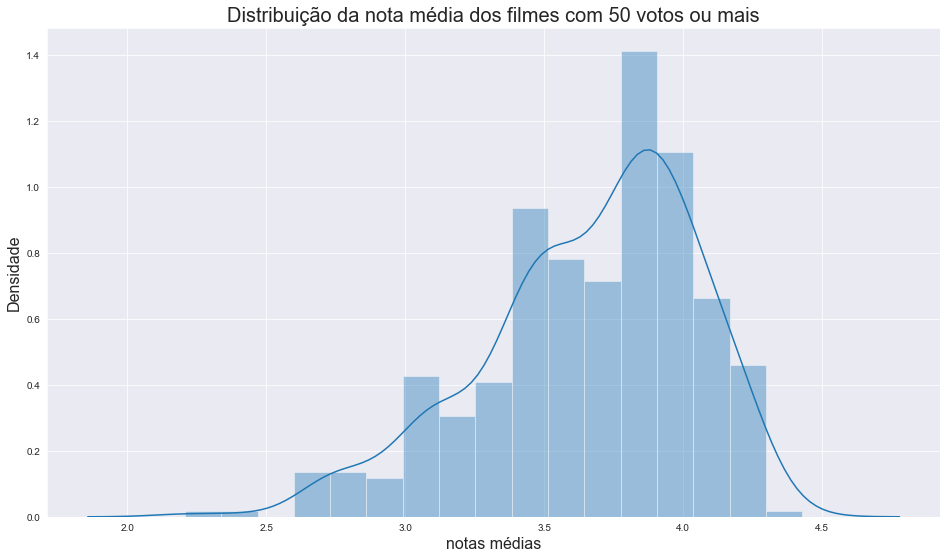

In [17]:
# solução histograma
ax = sns.distplot(filmes["nota_media"])
ax.figure.set_size_inches(16,9)
ax.set_title("Distribuição da nota média dos filmes com 50 votos ou mais", fontsize = 20)
ax.set_xlabel("notas médias", fontsize = 16)
ax.set_ylabel("Densidade", fontsize = 16)
ax

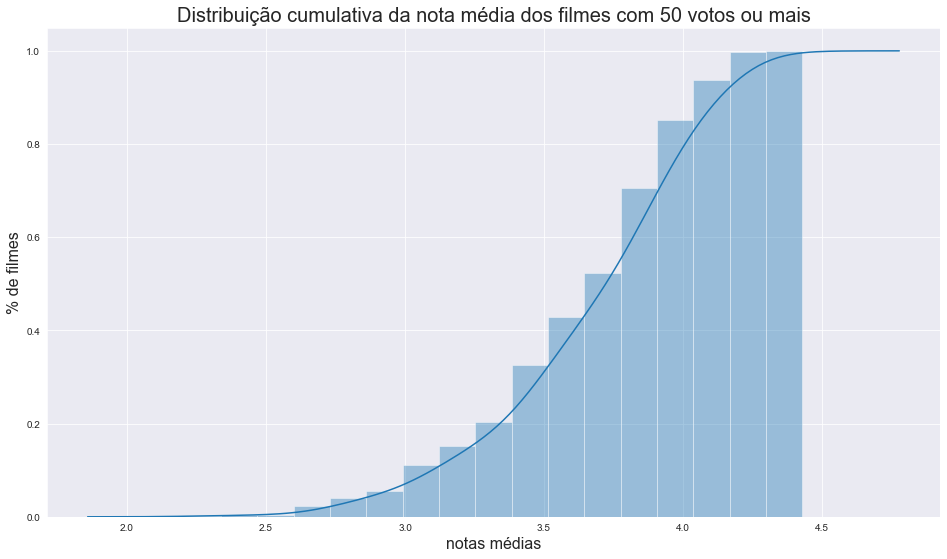

In [18]:
# solução cumulativa
ax = sns.distplot(filmes["nota_media"], hist_kws= {"cumulative" : True},
                  kde_kws = {"cumulative" : True})

ax.figure.set_size_inches(16,9)
ax.set_title("Distribuição cumulativa da nota média dos filmes com 50 votos ou mais", fontsize = 20)
ax.set_xlabel("notas médias", fontsize = 16)
ax.set_ylabel("% de filmes", fontsize = 16)
ax

## Pergunta: Visualize o total de votos

- histograma
- cummulative distribution function

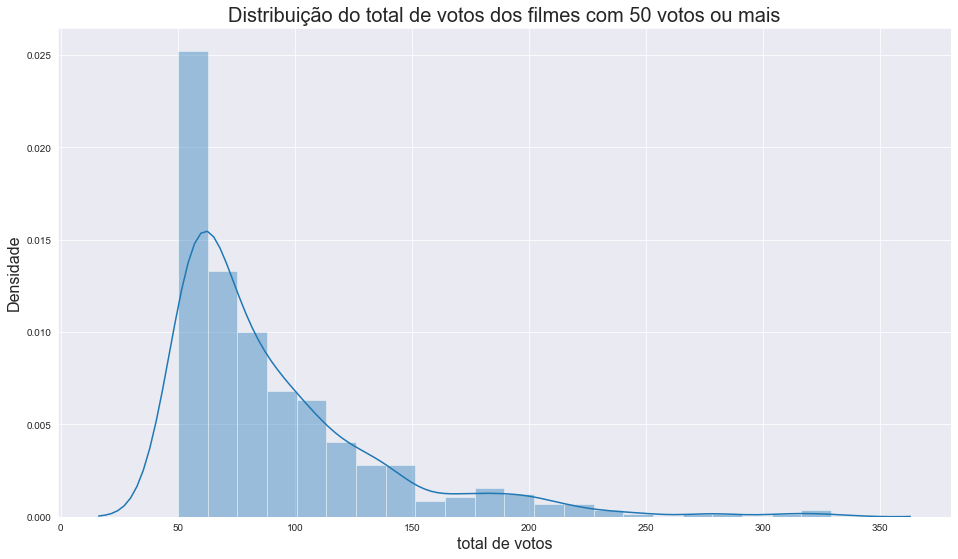

In [19]:
# solução histograma
ax = sns.distplot(filmes["total_de_votos"])
ax.figure.set_size_inches(16,9)
ax.set_title("Distribuição do total de votos dos filmes com 50 votos ou mais", fontsize = 20)
ax.set_xlabel("total de votos", fontsize = 16)
ax.set_ylabel("Densidade", fontsize = 16)
ax

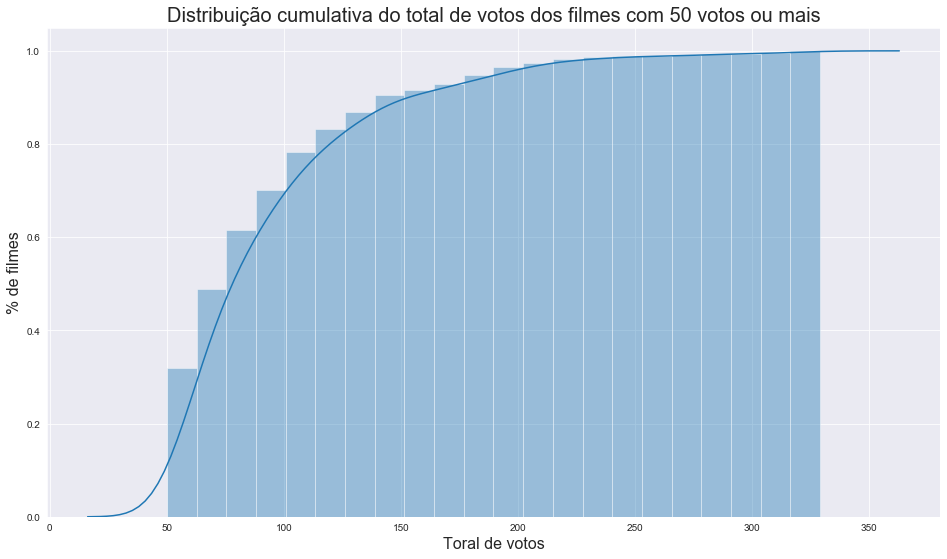

In [20]:
# solução cumulativa
ax = sns.distplot(filmes["total_de_votos"],
                  hist_kws= {"cumulative" : True}, kde_kws = {"cumulative" : True})

ax.figure.set_size_inches(16,9)
ax.set_title("Distribuição cumulativa do total de votos dos filmes com 50 votos ou mais", fontsize = 20)
ax.set_xlabel("Toral de votos", fontsize = 16)
ax.set_ylabel("% de filmes", fontsize = 16)
ax

### O histograma cumulativo acima pode ser difícil de interpretar em primeira análise. Para facilitar a compreensão aqui está uma informação que pode ser retirada deste gráfico.

In [21]:
print(f"50% dos filmes possuem {filmes.total_de_votos.quantile(0.5)} votos ou menos.")

50% dos filmes possuem 76.0 votos ou menos.


## Pergunta: 20% dos filmes do dataframe tem nota maior que? 

- lembre-se da função `quantile` do pandas

In [22]:
# solução
filmes.nota_media.quantile(0.2)

3.3742857142857146

In [23]:
print(f"20 porcento dos filmes tem nota maior que {filmes.nota_media.quantile(0.2):0.2f}")

20 porcento dos filmes tem nota maior que 3.37


## Vamos separar a coluna `generos` em diversas colunas.

- O código já está pronto.

In [24]:
filmes['generos'] = filmes['generos'].str.replace('-', '')
generos = filmes['generos'].str.get_dummies()
print("Temos %d generos distintos" % generos.shape[1])

Temos 19 generos distintos


In [25]:
filmes = filmes.join(generos).drop(columns=['generos'], axis=1)
filmes.head()

,titulo,ano_de_lancamento,nota_media,total_de_votos,Action,Adventure,Animation,Children,Comedy,Crime,...,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
filmeId,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),1995.0,3.920930,215.0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,Jumanji (1995),1995.0,3.431818,110.0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Grumpier Old Men (1995),1995.0,3.259615,52.0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
6,Heat (1995),1995.0,3.946078,102.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
7,Sabrina (1995),1995.0,3.185185,54.0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


## Pergunta: visualização de quantos filmes existem por genero

- Para cada um dos generos você deve agrupar o número de filmes
- Ordene as barras, na esquerda o genero com mais filmes, na direita o que tem menos filmes

Dica:

- Para fazer a soma de uma ou mais colunas individualmente você pode usar `seu_dataframe.sum()`
- Não precisa usar o dataframe `filmes`, somente o dataframe `generos`
- Em certas situações é mais fácil usar as funções de plotagem do pandas ao invés do seaborn

In [26]:
generos.head()

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
filmeId,,,,,,,,,,,,,,,,,,,
1,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
6,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0


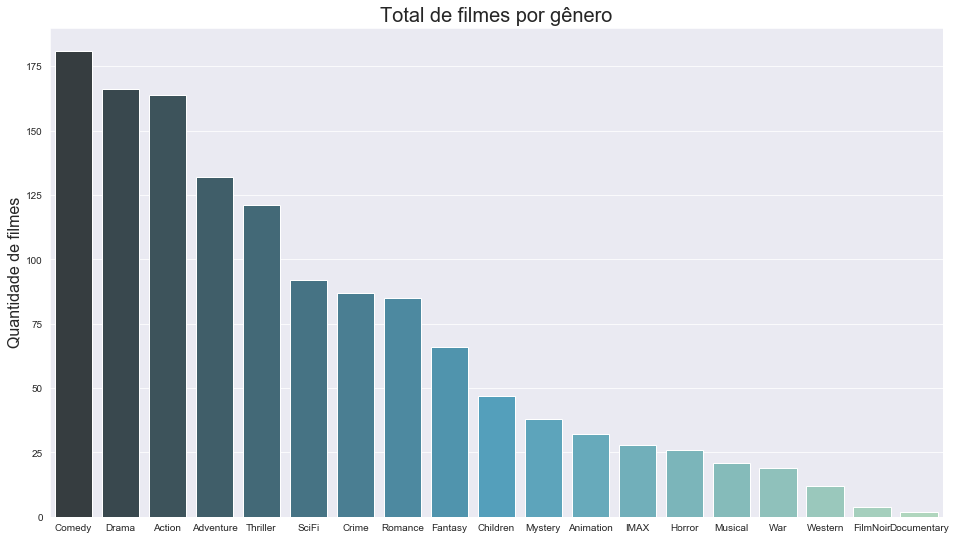

In [27]:
# solução
ax = sns.barplot(x = generos.sum().sort_values(ascending = False).index,
                 y = generos.sum().sort_values(ascending = False), palette = 'GnBu_d')
ax.figure.set_size_inches(16,9)
ax.set_title("Total de filmes por gênero", fontsize = 20)
#ax.set_xlabel("Gênero", fontsize = 16)
ax.set_ylabel("Quantidade de filmes", fontsize = 16)
ax

## Pergunta: Quais são os 5 generos com mais filmes?

Dica:

- `sort_values()` pode ordenar uma Series do pandas

In [28]:
# solução
top5_generos_em_quantidade_de_filmes = generos.sum().sort_values(ascending = False).index[0:5]

In [29]:
print(top5_generos_em_quantidade_de_filmes)

Index(['Comedy', 'Drama', 'Action', 'Adventure', 'Thriller'], dtype='object')


## Pergunta: visualização de votos por genero

- o código que gera os votos por genero já está pronto
- ordene as categorias da mais visualizada para a menos visualizada
- gere a visualização por genero

In [30]:
votos_por_genero_por_filme = pd.DataFrame((generos.values.T * filmes['total_de_votos'].values).T, columns = generos.columns)
votos_por_genero_por_filme.head()

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
0,0.0,215.0,215.0,215.0,215.0,0.0,0.0,0.0,215.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,110.0,0.0,110.0,0.0,0.0,0.0,0.0,110.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,52.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,0.0,0.0,0.0,0.0
3,102.0,0.0,0.0,0.0,0.0,102.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,102.0,0.0,0.0
4,0.0,0.0,0.0,0.0,54.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54.0,0.0,0.0,0.0,0.0


In [31]:
# solucão
votos_por_genero_ordenado = votos_por_genero_por_filme.sum().sort_values(ascending = False)
votos_por_genero = votos_por_genero_por_filme.sum()
votos_por_genero_ordenado

Action         15734.0
Drama          15445.0
Comedy         15330.0
Adventure      13117.0
Thriller       11907.0
SciFi           8989.0
Crime           8649.0
Romance         7444.0
Fantasy         5993.0
Children        4331.0
Mystery         3452.0
Animation       3066.0
IMAX            2492.0
Horror          2215.0
War             2113.0
Musical         1822.0
Western          900.0
FilmNoir         291.0
Documentary      108.0
dtype: float64

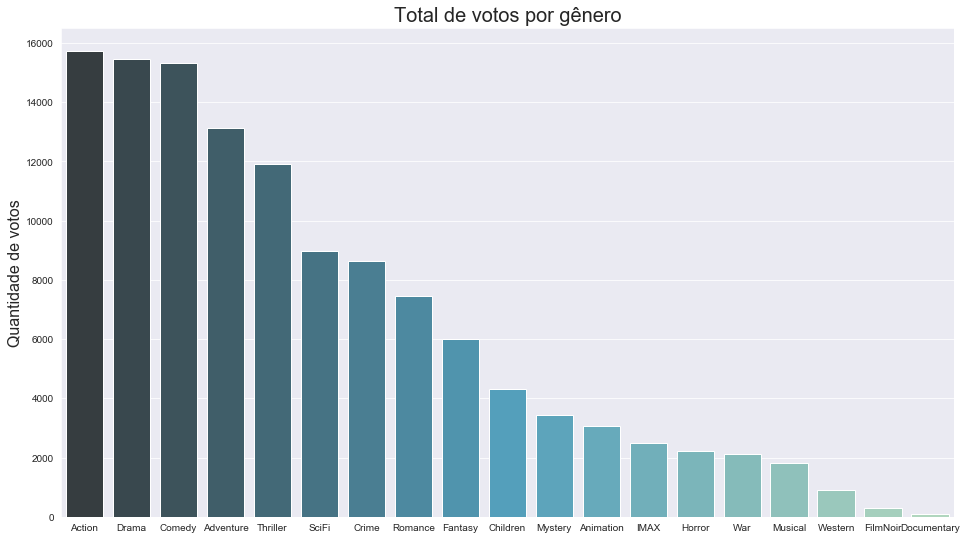

In [32]:
# solução

ax = sns.barplot(x =votos_por_genero_ordenado.index,
                 y = votos_por_genero_ordenado,
                 palette = 'GnBu_d')
ax.figure.set_size_inches(16,9)
ax.set_title("Total de votos por gênero", fontsize = 20)
#ax.set_xlabel("Gênero", fontsize = 16)
ax.set_ylabel("Quantidade de votos", fontsize = 16)
ax

## Pergunta : votos por filme por genero

Queremos entender a quantidade de votos em relação a quantidade de filmes existentes naquele genero.

Por exemplo: 
- se temos 1000 votos de `Ação` e 10 filmes desse genero, foram 100 votos por filme nesse genero.
- se o gênero `Documentário` tem 2 filmes e 500 votos, ele tem 250 votos por filme nesse gênero.

Queremos entender isso, a "popularidade" média de um filme em cada categoria, isto é, o número de votos dividido pelo número de filmes, organizado para cada categoria.

- Você já possui o número de votos por genero
- Calcule o número de votos por genero dividido pelo total de filmes por genero
- Ordene do maior para o menor
- Plote um gráfico para visualizarmos esses dados

In [33]:
df_totais = pd.DataFrame(index = generos.sum().index,
                         data = {"total_de_votos" : votos_por_genero_por_filme.sum().values,
                                 "total_de_filmes" : generos.sum().values})
df_totais

,total_de_votos,total_de_filmes
Action,15734.0,164
Adventure,13117.0,132
Animation,3066.0,32
Children,4331.0,47
Comedy,15330.0,181
Crime,8649.0,87
Documentary,108.0,2
Drama,15445.0,166
Fantasy,5993.0,66
FilmNoir,291.0,4


In [34]:
# solucao código
df_totais["relacao_votos_filme_genero"] = (df_totais["total_de_votos"] / df_totais["total_de_filmes"])
lista_ordenada_de_relacoes = df_totais["relacao_votos_filme_genero"].sort_values(ascending = False)
lista_ordenada_de_relacoes

War            111.210526
Crime           99.413793
Adventure       99.371212
Thriller        98.404959
SciFi           97.706522
Action          95.939024
Animation       95.812500
Drama           93.042169
Children        92.148936
Mystery         90.842105
Fantasy         90.803030
IMAX            89.000000
Romance         87.576471
Musical         86.761905
Horror          85.192308
Comedy          84.696133
Western         75.000000
FilmNoir        72.750000
Documentary     54.000000
Name: relacao_votos_filme_genero, dtype: float64

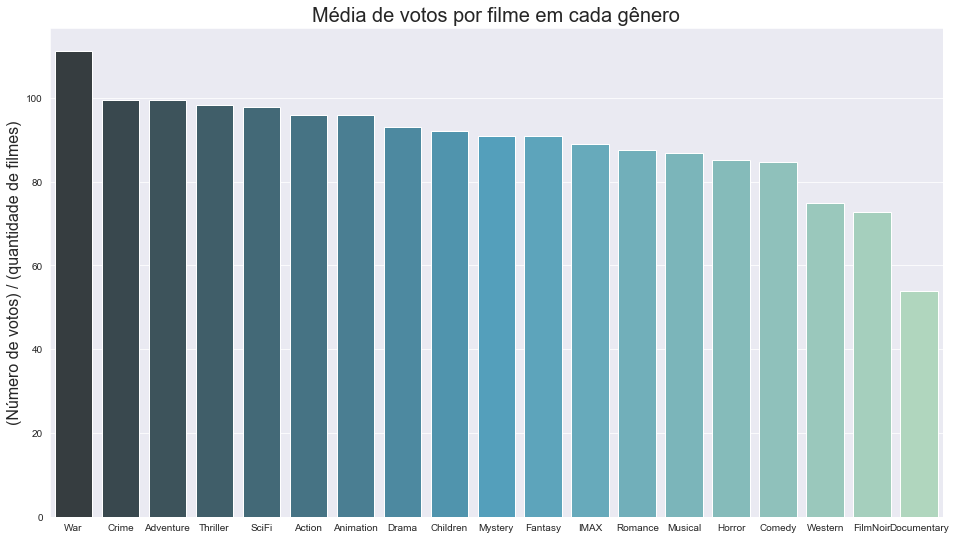

In [35]:
# solução com visualização 
ax = sns.barplot(x =lista_ordenada_de_relacoes.index,
                 y = lista_ordenada_de_relacoes,
                 palette = 'GnBu_d')
ax.figure.set_size_inches(16,9)
ax.set_title("Média de votos por filme em cada gênero", fontsize = 20)
#ax.set_xlabel("Gênero", fontsize = 16)
ax.set_ylabel("(Número de votos) / (quantidade de filmes)", fontsize = 16)
ax

In [78]:
df_totais[["total_de_votos","total_de_filmes"]].corr()

,total_de_votos,total_de_filmes
total_de_votos,1.000000,0.995717
total_de_filmes,0.995717,1.000000


## Pergunta: Olhando as 3 últimas visualizações o que você conclui sobre os generos `Action` e `War`?

### Solução (texto livre): 
### Embora o gênero Action tenha a maior quantidade absoluta de votos, o gênero War obteve maior relação de votos por filme, ou seja, há uma indicação de que a grande quantidade de votos no gênero Action seja proveniente da, também, grande quantidade de filmes desse gênero. Há uma correlação.
### Os números e as vizualizações também indicam que o gênero War possui maior engajamento, por assim dizer, pois consegue, em média, mais votos por filme do que os demais gêneros.
### Esse caso nos mostra a importância de não levarmos em conta apenas valores absolutos nas nossas análises.
    

## Pergunta: Crie 2 boxplots no mesmo plot comparando a coluna `total_de_votos` dos filmes de categoria `Horror` e `Adventure`  

Dica:

- as vezes é mais fácil usar o boxplot do matplotlib ao invés do seaborn
- plt.boxplot suporta o parâmetro labels com uma lista de nomes para cada boxplot plotado

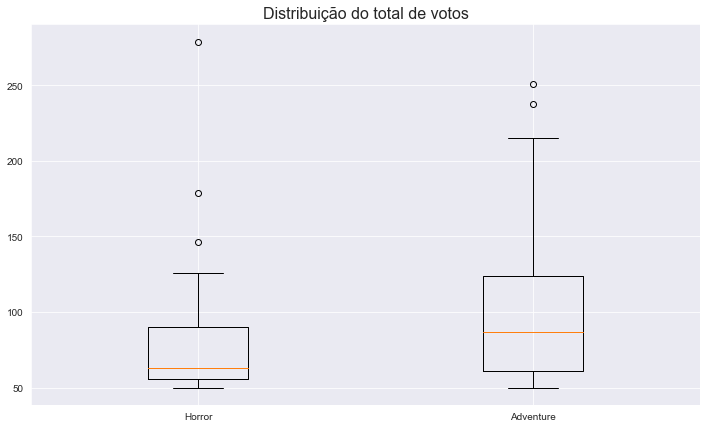

In [36]:
# solução:
plt.figure(figsize = (12,7))
plt.boxplot([filmes.query("Horror == 1")["total_de_votos"],
             filmes.query("Adventure == 1")["total_de_votos"]],
            labels = ["Horror", "Adventure"], widths = 0.3)
plt.title("Distribuição do total de votos", fontsize = 16)
plt.show()

## Pergunta: mostre agora um boxplot para cada uma das categorias

Dica:
- use generos.columns para acessar todos os gêneros
- já removemos os hífens dos nomes das colunas quando criamos as colunas de gêneros
- plt (pyplot) do matplotlib suporta a função xticks(rotation=90) para rotacionar os labels

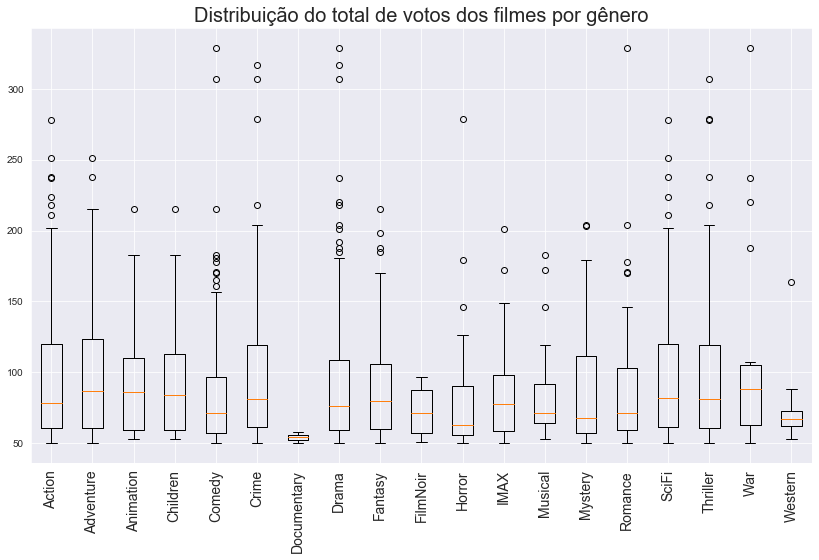

In [37]:
plt.figure(figsize = (14,8))
plt.boxplot([filmes.query(f"{x} == 1")["total_de_votos"] for x in generos.columns],
            labels = [x for x in generos.columns])
plt.tick_params(axis='x', rotation=90, labelsize = 14)
plt.title("Distribuição do total de votos dos filmes por gênero", fontsize = 20)
plt.show()

## Pergunta: desejo criar um filme com somente um dos gêneros: `Horror` ou `Adventure`. Quero ter uma chance maior de ter um faturamento que pague minhas contas, mesmo que não seja um super sucesso absurdo de vendas. Qual dos 2 gêneros você sugere?

### Solução: 
### Aparentemente, a melhor opção seria criar um filme do gênero Adventure, pois como pudemos observar com os números e gráficos anteriores, filmes desse gênero possuem mais expectadores votantes. Embora exista um número muito maior de filmes de Adventure em relação à Horror, estes possuem maior relação de votos por filme, ou seja, são mais assistidos ou, ao menos, conseguem maior engajamento do público.    


## Pergunta: nossa análise foi até então visual. Aplique um teste estatístico para verificar se existe significância estatística na distribuição dos votos dos filmes de `Adventure` e `Horror`. Sua recomendação continua a mesma? Explique.

Passos:

- visualize a distribuição de ambas através de histogramas
- se suspeitar normalidade na distribuição, faça um teste de normalidade para ambas
- aplique um teste adequado de comparação das distribuições
- explique o resultado encontrado
- utilize p=0.05

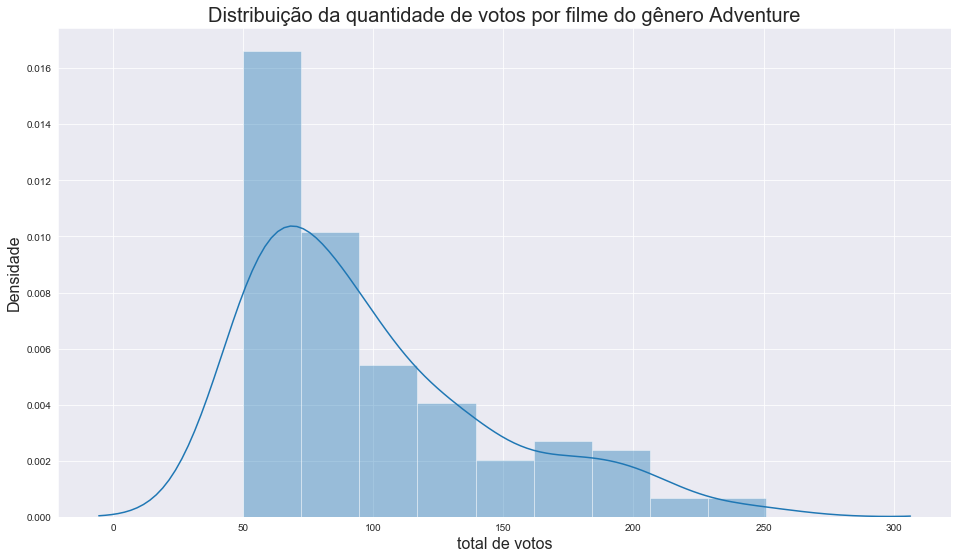

In [38]:
# solucao histograma de aventura
ax = sns.distplot(filmes.query("Adventure == 1")["total_de_votos"])
ax.figure.set_size_inches(16,9)
ax.set_title("Distribuição da quantidade de votos por filme do gênero Adventure", fontsize = 20)
ax.set_xlabel("total de votos", fontsize = 16)
ax.set_ylabel("Densidade", fontsize = 16)
ax

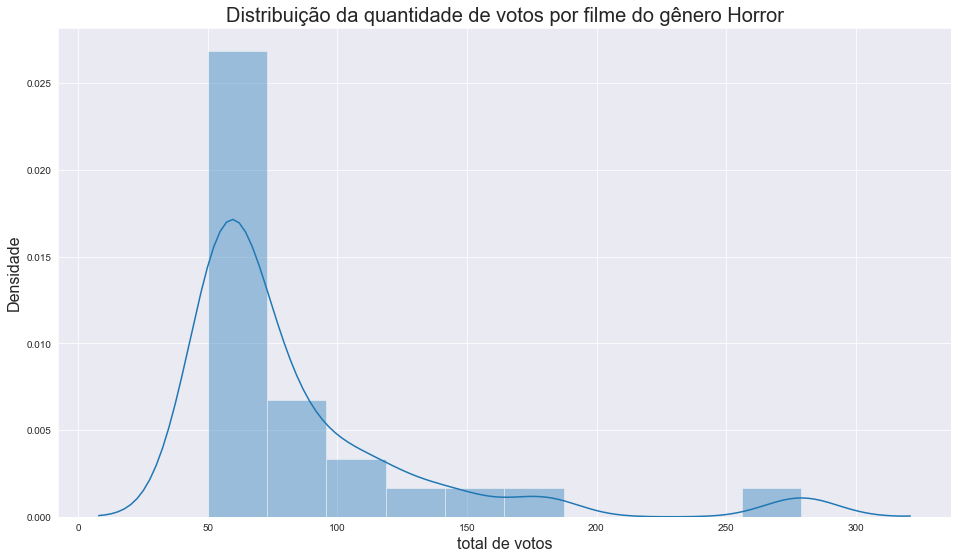

In [39]:
# solucao histograma de horror
ax = sns.distplot(filmes.query("Horror == 1")["total_de_votos"])
ax.figure.set_size_inches(16,9)
ax.set_title("Distribuição da quantidade de votos por filme do gênero Horror", fontsize = 20)
ax.set_xlabel("total de votos", fontsize = 16)
ax.set_ylabel("Densidade", fontsize = 16)
ax

In [40]:
# solucao teste de normalidade ou justificativa para nao utiliza-lo
from scipy.stats import normaltest
_, P_valor_adventure = normaltest(filmes.query("Adventure == 1")["total_de_votos"])
_, P_valor_horror = normaltest(filmes.query("Horror == 1")["total_de_votos"])

print(f"O p valor para a normalidade do total de votos do gênero Adventure é: {P_valor_adventure}")
print(f"O p valor para a normalidade do total de votos do gênero Horror é: {P_valor_horror}")

O p valor para a normalidade do total de votos do gênero Adventure é: 5.987863006199139e-06
O p valor para a normalidade do total de votos do gênero Horror é: 1.2786148884334685e-07


### Conclusão: O p valor encontrado, no dois casos, está abaixo do nível de significância (alpha = 5%), ou seja, a hipótese nula é rejeitada. No caso do normaltest essa hipótese afirma que os dados testados são advindos de uma distribução Normal, portanto concluímos que o total de votos por filme agrupado por gêneros não é proveniente de uma distribuição normal.
### Sabendo disso, devemos utilizar testes estatísticos que não presupõem normalidade, para que possamos chegar a conclusões confiáveis.
### Dentre os testes adequados (não paramétricos) há o teste de Wilcoxon (rank sums) que pode ser utilizado para comparar duas amostras. A hipótese nula deste teste afirma que as duas amostras comparadas são proveninentes de uma mesma distribuição, ou seja, são estatísticamente iguais.

In [41]:
# solução com o teste desejado
from scipy.stats import ranksums

_, P_valor_adventure_horror = ranksums(filmes.query("Adventure == 1")["total_de_votos"], 
                      filmes.query("Horror == 1")["total_de_votos"])
print(f"O p valor é: {P_valor_adventure_horror}")

O p valor é: 0.04782366231999856


### Solução (explique sua conclusão):
### O p valor calculado através do teste rank-sum de Wilcoxon, embora próximo, não superou a significância (alpha = 5%), portanto a hipótese nula de que as duas amostras sejam estatísticamente iguais é rejeitada. As amostras são, portanto, estatísticamente diferentes.
### Sendo assim a recomendação anterior é mantida. Um filme do gênero Adventure possui maiores chances de ser votado.
 

## Pergunta: Faça os mesmos boxplots para as notas médias (`nota_media`) dos gêneros `Adventure` e `Horror`.

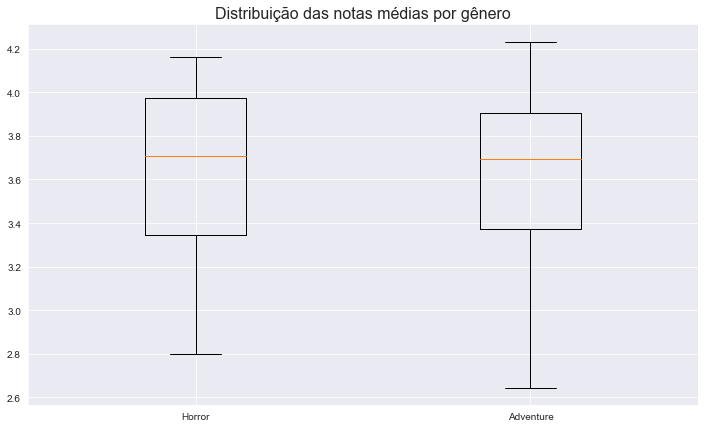

In [42]:
# solução:
plt.figure(figsize = (12,7))
plt.boxplot([filmes.query("Horror == 1")["nota_media"],
             filmes.query("Adventure == 1")["nota_media"]],
            labels = ["Horror", "Adventure"], widths = 0.3)
plt.title("Distribuição das notas médias por gênero", fontsize = 16)
plt.show()

## Pergunta: Quero fazer um filme que seja sucesso de crítica, com pessoas dando notas altas, mesmo que não tenha um número muito grande de pessoas assistindo. Qual gênero você recomenda se tenho que escolher somente um entre `Adventure` e `Horror`?

### Solução:
### Em relação à notas médias por filme, os dois gêneros parecem ser semelhantes, porém o gênero Horror está levemente acima, tanto em sua mediana quanto no terceito quartil. Portanto, se o foco não está em atrair grandes quantidades de pessoas assistindo ou votando, e sim no valor das notas, um filme do gênero Horror pode ser a melhor escolha.


## Pergunta: nossa análise foi até então visual. Aplique um teste estatístico para verificar se existe significância estatística na distribuição das notas dos filmes de `Adventure` e `Horror`.

Passos:

- visualize a distribuição de ambas através de histogramas
- se suspeitar normalidade na distribuição, faça um teste de normalidade para ambas
- aplique um teste adequado de comparação das distribuições
- explique o resultado encontrado
- utilize p=0.05

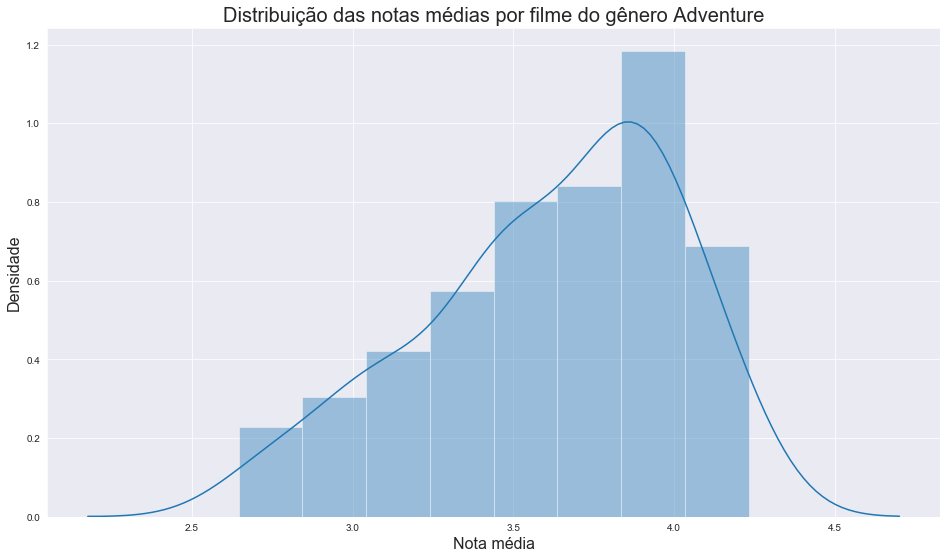

In [43]:
# solucao histograma de aventura
ax = sns.distplot(filmes.query("Adventure == 1")["nota_media"])
ax.figure.set_size_inches(16,9)
ax.set_title("Distribuição das notas médias por filme do gênero Adventure", fontsize = 20)
ax.set_xlabel("Nota média", fontsize = 16)
ax.set_ylabel("Densidade", fontsize = 16)
ax

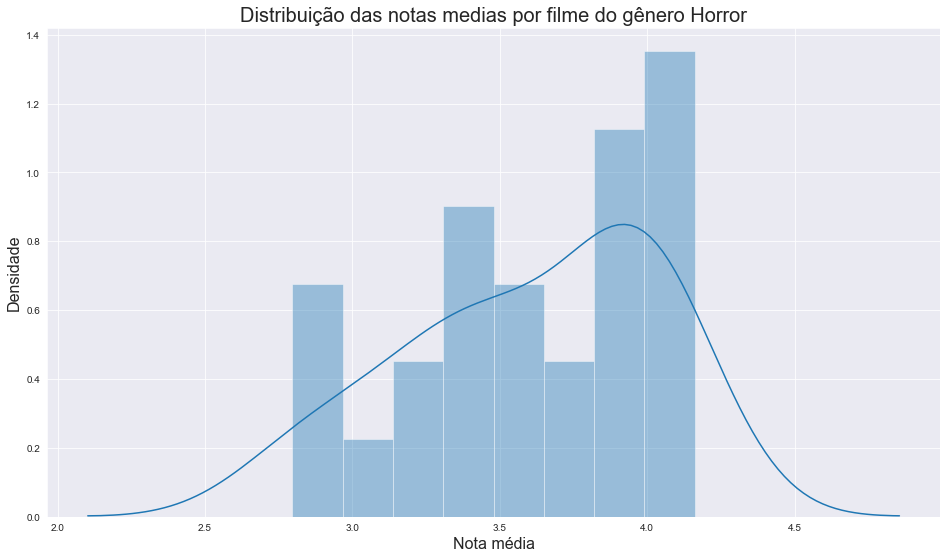

In [44]:
# solucao histograma de horror
ax = sns.distplot(filmes.query("Horror == 1")["nota_media"], bins = 8)
ax.figure.set_size_inches(16,9)
ax.set_title("Distribuição das notas medias por filme do gênero Horror", fontsize = 20)
ax.set_xlabel("Nota média", fontsize = 16)
ax.set_ylabel("Densidade", fontsize = 16)
ax

In [45]:
# solucao teste de normalidade ou justificativa para nao utiliza-lo
_, P_valor_adventure = normaltest(filmes.query("Adventure == 1")["nota_media"])
_, P_valor_horror = normaltest(filmes.query("Horror == 1")["nota_media"])

print(f"O p valor para a normalidade das notas médias do gênero Adventure é: {P_valor_adventure}")
print(f"O p valor para a normalidade das notas médias do gênero Horror é: {P_valor_horror}")

O p valor para a normalidade das notas médias do gênero Adventure é: 0.012835697582553224
O p valor para a normalidade das notas médias do gênero Horror é: 0.21186284682483916


In [46]:
total_de_notas_medias_Horror = len(filmes.query("Horror == 1")["nota_media"])
print(f"Há {total_de_notas_medias_Horror} notas médias para o gênero Horror")

Há 26 notas médias para o gênero Horror


### Analisando os p valores calculados, concluímos que a distribuição das notas médias do gênero Adventure claramente não segue uma Normal, porém o p valor para o teste de normalidade das notas do gênero Horror está indicando que devemos aceitar a hipótese nula e considerar que essas notas médias seguem uma distribuição normal. 
### Observando o histograma essa segunda conclusão é prontamente descartada. O teste de normalidade, nesse caso, não é confiável. Isso se deve ao tamanho reduzido da amostra utilizada.

In [47]:
# solução com o teste desejado

_, P_valor_adventure_horror = ranksums(filmes.query("Adventure == 1")["nota_media"], 
                      filmes.query("Horror == 1")["nota_media"])
print(f"O p valor é: {P_valor_adventure_horror}")

O p valor é: 0.8310397344212459


## Sua recomendação para maior sucesso de crítica em nota alta entre `Horror` e `Adventure` continua a mesma? Explique.



### Solução:
### De acordo com o p valor resultante do teste rank sums de Wilcoxon, devemos aceitar a hipótese nula de que as distribuições comparadas são estatísticamente iguais. Portanto a recomendação muda, sendo as distribuições estatísticamente iguais, não faz diferença escolher um gênero ou outro, com um nível de confiança de 95%, podemos afirmar que qualquer das escolhas levará ao mesmo resultado.


## Pergunta: Quero fazer um filme que seja primeiro sucesso de crítica, com pessoas dando notas altas. Em segundo lugar quero que seja popular (mais pessoas assistam). Com as informações visuais e estatísticas, supondo poder escolher somente um, qual dois 2 gêneros você recomenda agora? `Horror` ou `Adventure`?

### Solução:
### Como vimos anteriormente, em relação à notas altas não há diferença significativa entre os gêneros, porém em relação à popularidade há diferença e o gênero que estatísticamente gera maior quantidade de votos é Adventure. Portanto essa seria a melhor escolha.


## Pergunta: Quais são os top 5 filmes dos 2 generos mais assistidas?

- utilize os 2 generos mais votados em `votos_por_genero`
- utilize a `nota_media` para definir o top 5 filmes
- o resultado são 5, não 10 filmes

In [48]:
votos_por_genero

Action         15734.0
Adventure      13117.0
Animation       3066.0
Children        4331.0
Comedy         15330.0
Crime           8649.0
Documentary      108.0
Drama          15445.0
Fantasy         5993.0
FilmNoir         291.0
Horror          2215.0
IMAX            2492.0
Musical         1822.0
Mystery         3452.0
Romance         7444.0
SciFi           8989.0
Thriller       11907.0
War             2113.0
Western          900.0
dtype: float64

In [49]:
# solução: calculando os 2 generos mais votados
votos_por_genero.sort_values(ascending = False)[:2]

Action    15734.0
Drama     15445.0
dtype: float64

In [50]:
# solução: encontrando os top 5 filmes desses generos
maiores_notas_dos_mais_votados = filmes.query("Action == 1")["nota_media"].append(filmes.query("Drama == 1")["nota_media"])
maiores_notas_dos_mais_votados.drop_duplicates(keep = "first", inplace = True)

top_five_action_drama = filmes.loc[maiores_notas_dos_mais_votados.sort_values(ascending = False)[:5].index]["titulo"]
top_five_action_drama

filmeId
318     Shawshank Redemption, The (1994)
858                Godfather, The (1972)
2959                   Fight Club (1999)
1276               Cool Hand Luke (1967)
1221      Godfather: Part II, The (1974)
Name: titulo, dtype: object

## Pergunta: Quais são os 2 generos com maior valor de correlação com a `nota_media`? E os 2 com menor valor de correlação com a `nota_media`?

- O pandas possui a função `corr` para calcular correlação entre todas as colunas

In [51]:
# solucao
series_correlacao_notas_genero = filmes.drop(["ano_de_lancamento","titulo","total_de_votos"],axis = 1).corr()[:1].max()

print(f"Considerando correlação positiva ou negativa. Os dois gêneros com maior correlação com a nota média são: \n{series_correlacao_notas_genero.abs().sort_values(ascending = False)[1:3]}")
print(f"\nOs dois gêneros com maior correlação positiva com a nota média são:\n{series_correlacao_notas_genero.sort_values(ascending = False)[1:3]}")
print(f"\nOs dois gêneros com maior correlação negativa com a nota média são:\n{series_correlacao_notas_genero.sort_values(ascending = False)[len(series_correlacao_notas_genero)-2:len(series_correlacao_notas_genero)]} ")
print(f"\nOs dois gêneros com menor correlação, positiva ou negativa, com a nota média são:\n{series_correlacao_notas_genero.abs().sort_values(ascending = False)[len(series_correlacao_notas_genero)-2:len(series_correlacao_notas_genero)]} ")
print("\nA lista completa dos coeficiêntes de correlação de Pearson econtra-se na célula abaixo.")

Considerando correlação positiva ou negativa. Os dois gêneros com maior correlação com a nota média são: 
Drama     0.277662
Comedy    0.256005
dtype: float64

Os dois gêneros com maior correlação positiva com a nota média são:
Drama    0.277662
Crime    0.190220
dtype: float64

Os dois gêneros com maior correlação negativa com a nota média são:
Action   -0.154089
Comedy   -0.256005
dtype: float64 

Os dois gêneros com menor correlação, positiva ou negativa, com a nota média são:
Musical        0.008529
Documentary    0.003486
dtype: float64 

A lista completa dos coeficiêntes de correlação de Pearson econtra-se na célula abaixo.


In [52]:
#Series com os coeficientes e seus respectivos gêneros
series_correlacao_notas_genero.sort_values(ascending = False)

nota_media     1.000000
Drama          0.277662
Crime          0.190220
Mystery        0.129914
War            0.125615
FilmNoir       0.081766
IMAX           0.064931
Animation      0.043071
Documentary   -0.003486
Musical       -0.008529
Thriller      -0.016782
Fantasy       -0.020986
Children      -0.030360
Horror        -0.033877
Western       -0.059642
Romance       -0.072002
Adventure     -0.079985
SciFi         -0.136717
Action        -0.154089
Comedy        -0.256005
dtype: float64

## Pergunta: Quais são os 2 generos com maior valor de correlação com `total_de_votos`? E quais os 2 com menor valor de correlação com `total_de_votos`?

In [53]:
# solucao
series_correlacao_votos_genero = filmes.drop(["ano_de_lancamento","titulo","nota_media"],axis = 1).corr()[:1].max()

print(f"Considerando correlação, positiva ou negativa. Os dois gêneros com maior correlação com o total de votos são: \n{series_correlacao_votos_genero.abs().sort_values(ascending = False)[1:3]}")
print(f"\nOs dois gêneros com maior correlação positiva com o total de votos são:\n{series_correlacao_votos_genero.sort_values(ascending = False)[1:3]}")
print(f"\nOs dois gêneros com maior correlação negativa com o total de votos são:\n{series_correlacao_votos_genero.sort_values(ascending = False)[len(series_correlacao_notas_genero)-2:len(series_correlacao_notas_genero)]} ")
print(f"\nOs dois gêneros com menor correlação, positiva ou negativa, com o total de votos são:\n{series_correlacao_votos_genero.abs().sort_values(ascending = False)[len(series_correlacao_notas_genero)-2:len(series_correlacao_notas_genero)]} ")
print("\nA lista completa dos coeficiêntes de correlação de Pearson econtra-se na célula abaixo.")

Considerando correlação, positiva ou negativa. Os dois gêneros com maior correlação com o total de votos são: 
Comedy       0.128527
Adventure    0.104380
dtype: float64

Os dois gêneros com maior correlação positiva com o total de votos são:
Adventure    0.104380
War          0.087999
dtype: float64

Os dois gêneros com maior correlação negativa com o total de votos são:
Western   -0.060789
Comedy    -0.128527
dtype: float64 

Os dois gêneros com menor correlação, positiva ou negativa, com o total de votos são:
Mystery     0.007051
Children    0.001764
dtype: float64 

A lista completa dos coeficiêntes de correlação de Pearson econtra-se na célula abaixo.


In [54]:
series_correlacao_votos_genero.sort_values(ascending = False)

total_de_votos    1.000000
Adventure         0.104380
War               0.087999
Thriller          0.085525
Crime             0.079766
Action            0.066239
SciFi             0.063802
Animation         0.023442
Drama             0.018779
Children          0.001764
Mystery          -0.007051
Fantasy          -0.009976
IMAX             -0.016285
Musical          -0.024741
Horror           -0.036132
FilmNoir         -0.039408
Romance          -0.045427
Documentary      -0.055010
Western          -0.060789
Comedy           -0.128527
dtype: float64

## Pergunta: Visualize graficamente o relacionamento entre ano de lançamento e nota média

- Use o gráfico `lineplot`

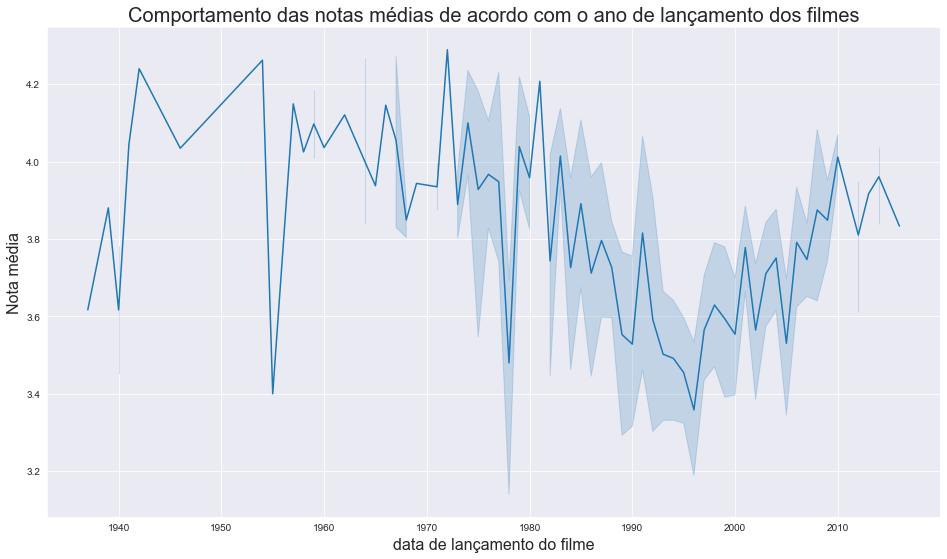

In [55]:
# solucao

ax = sns.lineplot(x = "ano_de_lancamento", y = "nota_media", data = filmes)
ax.figure.set_size_inches(16,9)
ax.set_title("Comportamento das notas médias de acordo com o ano de lançamento dos filmes", fontsize = 20)
ax.set_xlabel("data de lançamento do filme", fontsize = 16)
ax.set_ylabel("Nota média", fontsize = 16)
ax

## Pergunta: Interprete a correlação entre `ano_de_lancamento` e a `nota_media`?

- Calcule a correlação numericamente (use o `corr` do pandas)
- Correlação não implica causalidade, qual "problema" na coleta dos dados pode gerar esse tipo de correlação?

In [56]:
# solução (código)
filmes[["ano_de_lancamento","nota_media"]].corr()

,ano_de_lancamento,nota_media
ano_de_lancamento,1.000000,-0.159146
nota_media,-0.159146,1.000000


### Solução (explicação)
### Existe uma correlação negativa entre as duas variáveis. Tal correlação não é muito significativa, tampouco é suficientemente baixa para ser totalmente ignorada. 
### Ao calcularmos os coeficientes de correalção de Pearson, estamos, de forma simplificada, comparando números. Mais especificamente, no caso acima estamos comparando séries numéricas. Trata-se de uma análise puramente matemática, mas após a obtenção dos coeficientes, podemos inferir sobre a causa dos resultados encontrados. Nesse caso não há indícios de que as duas variáveis tenham de fato relações de causalidade uma com a outra, portanto sua correlação provavelmente se deve ao acaso.
### Mais uma vez podemos notar a importância da reflexão sobre os resultados matemáticos obtidos.


## Pergunta: analise um pairplot

- crie uma variável chamada `infos` baseada nas colunas `ano_de_lancamento`, `nota_media` e `total_de_votos` de `filmes`
- faça o pairplot usando seaborn
- coloque uma regressão linear para cada pequeno plot dentro dele

In [57]:
# solução

filmes["infos"] = 0
for i in range(0,len(filmes)):
    a = []
    a.append( str(filmes["ano_de_lancamento"].iloc[i]))
    a.append(str(filmes["nota_media"].round(2).iloc[i]))
    a.append(str(filmes["total_de_votos"].iloc[i]))
    filmes["infos"].iloc[i] = a

C:\Users\Luan\Anaconda3\envs\alura_pandas\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [58]:
filmes.head()

,titulo,ano_de_lancamento,nota_media,total_de_votos,Action,Adventure,Animation,Children,Comedy,Crime,...,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western,infos
filmeId,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),1995.0,3.920930,215.0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,"[1995.0, 3.92, 215.0]"
2,Jumanji (1995),1995.0,3.431818,110.0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,"[1995.0, 3.43, 110.0]"
3,Grumpier Old Men (1995),1995.0,3.259615,52.0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,"[1995.0, 3.26, 52.0]"
6,Heat (1995),1995.0,3.946078,102.0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,"[1995.0, 3.95, 102.0]"
7,Sabrina (1995),1995.0,3.185185,54.0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,"[1995.0, 3.19, 54.0]"


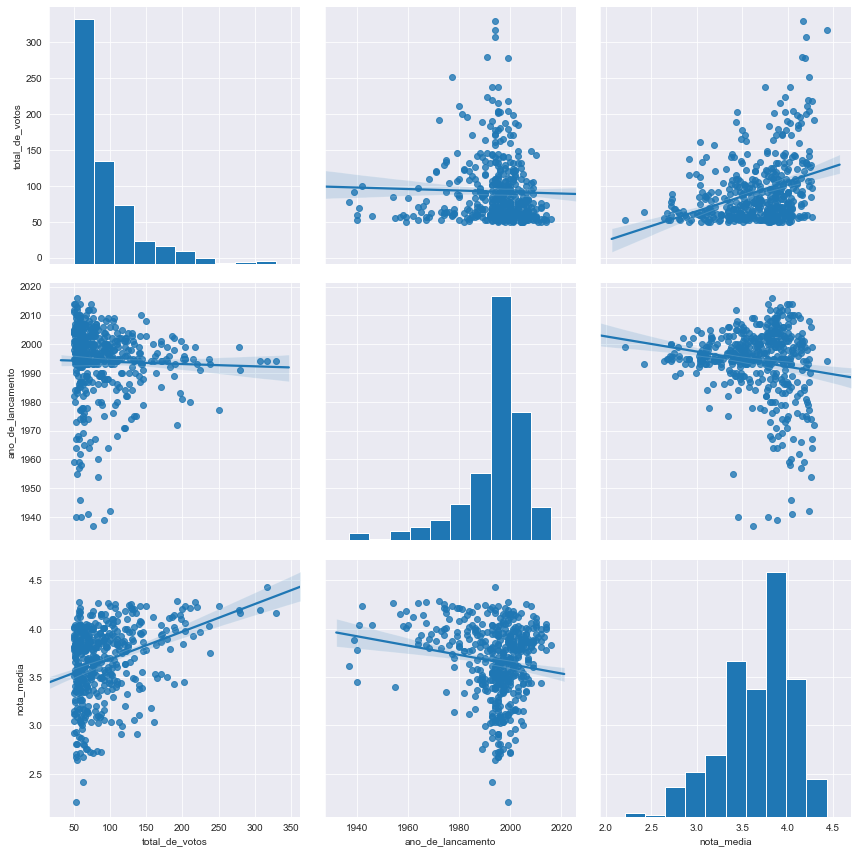

In [59]:
ax = sns.pairplot(filmes, vars = ["total_de_votos", "ano_de_lancamento", "nota_media"],
                kind = "reg", height = 4)
ax

## Pergunta: analise um pairplot dos filmes de `Animation`

- use o dataframe `filmes`
- em um único pairplot separe com cores distintas os filmes da categoria `Animation` dos outros
- use uma palete como `husl`
- use marcadores distintos para cada um dos dois grupos
- faça o pairplot usando seaborn e coloque uma regressão linear para cada pequeno plot dentro dele
- tanto em x quanto y use somente três variáveis: `total_de_votos`, `ano_de_lancamento`, `nota_media`

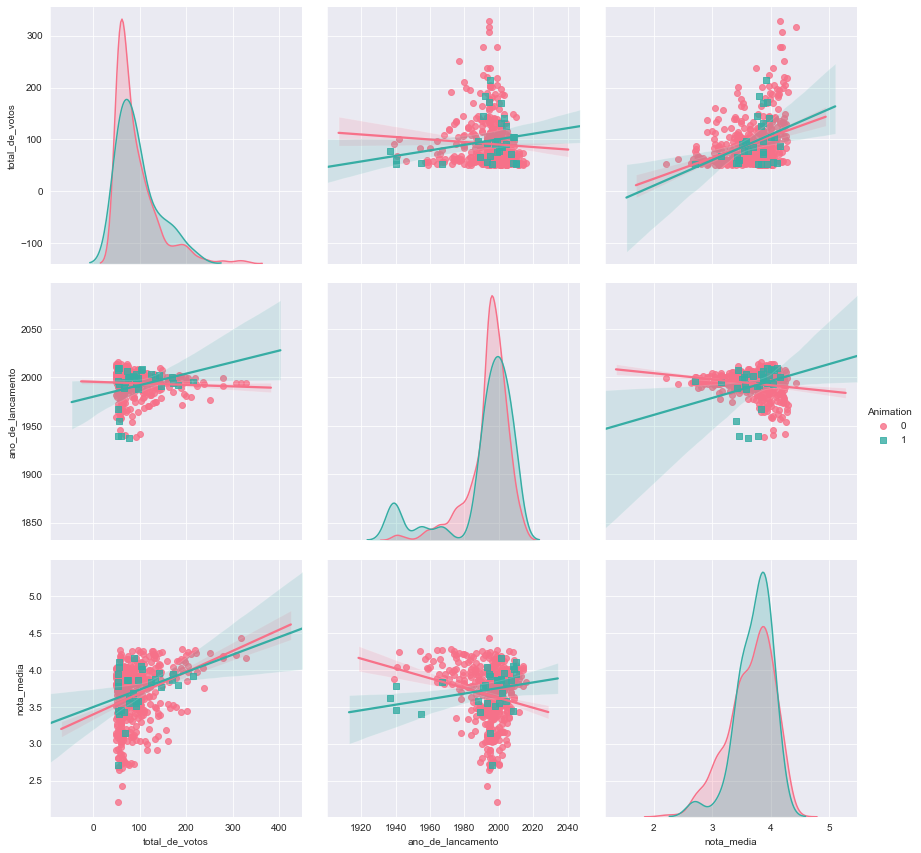

In [60]:
ax = sns.pairplot(filmes, vars = ["total_de_votos", "ano_de_lancamento", "nota_media"],
                  palette = "husl", hue = "Animation", kind = "reg", height = 4, markers = ["o","s"])
ax

## Pergunta: Analise a regressão em relação ao ano de lançamento.

- Como parece se comportar a `nota_media` de filmes de `Animation` mais antigos e mais recentes? (ano_de_lancamento x nota_media). Essa correlação parece ser baixa, mas parece ser linear?
- E o `ano_de_lancamento` x `total_de_votos`?
- E das outras categorias? Compare isso com os outros filmes.
- O que leva você levantar como hipótese para esse resultado?

### Solução:
### Sendo o primeiro grupo composto por filmes de todos os gêneros, exceto Animation e o segundo grupo composto apenas por filmes do gênero Animation. Temos que:
### A nota média para filmes do gênero Animation apresenta tendência de crescimento com o tempo, filmes mais recentes possuem nota média maior do que os mais antigos. Também podemos notar que há erros significativos em relação à reta de regressão linear, portanto essa correlação não é linear.

### Analisando a relação do total de votos com o ano de lançamento também observamos uma tendência de crescimento (contrária à tendência do primeiro grupo).

### Para o primeiro grupo, há tendência de diminuição de notas médias e de total de votos com o tempo.  

### Uma hipótese para explicar o crescimento da nota média dos filmes do gênero Animation seria o aumento da qualidade técnica das animações decorrente do avanço tecnológico nessa área.

### Uma hipótese que explicaria a tendência negativa de total de votos no primeiro grupo seria a de que o aumento do número de filmes produzidos não é proporcional ao número de filmes de qualidade, ou seja, são feitos mais filmes, porém o número de filmes de qualidade permanece constante ou cresce a uma taxa bem menor. 

## Pergunta: Explore

- compartilhe conosco 2 visualizações extras que julgar interessante
- explique o que encontrou
- use quantas células (texto ou código) julgar necessário

In [61]:
# solução

## Visualização extra 1: 
## Comparando a distribuição de notas médias dos filmes mais votados com filmes escolhidos de forma aleatória.

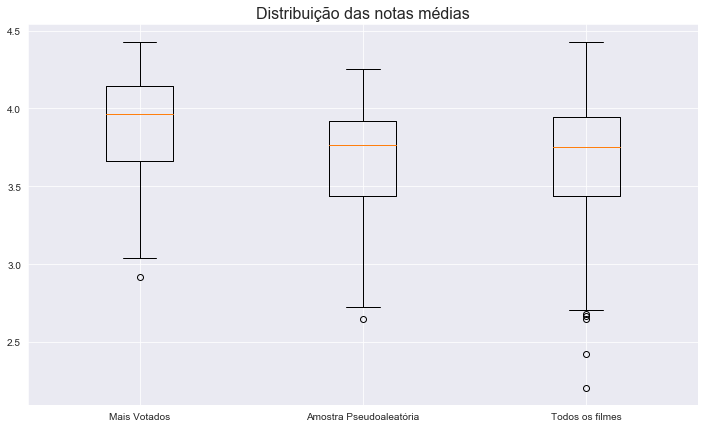

In [62]:
plt.figure(figsize = (12,7))

plt.boxplot([filmes.query("total_de_votos >= 120")["nota_media"],
             filmes.sample(90, random_state = 42)["nota_media"],
             filmes["nota_media"]],
           labels = ["Mais Votados","Amostra Pseudoaleatória","Todos os filmes"])
plt.title("Distribuição das notas médias", fontsize = 16)
plt.show()

## Será mesmo que as notas médias dos filmes mais votados podem ser consideradas estatísticamente diferentes das notas médias de uma amostra aleatória de filmes?
### Para responder essa pergunta devemos estipular um tamanho de amostra, criar as séries e depois aplicar o teste rank sums para obter o p valor julgar a hipótese nula.
#### Obs: Para garantir um resultado confiável, vamos comparar a amostra dos filmes mais votados com 1000 amostras geradas de forma pseudoaleatória e registrar o número de vezes que o p valor obtido ultrapassa a significância de 5%.

In [63]:
# Criando amostra com os 90 filmes mais votados:
mais_votados_90 = filmes.query("total_de_votos >= 120")["nota_media"]
indicador = 0
for i in range(1,1001):
    SEED = i
# Criando amostra pseudoaleatória com 90 filmes:
    amostra_filmes_90 = filmes.sample(90, random_state = SEED)["nota_media"]
# Aplicando teste rank sums (hipótese nula: As distribuições são estatísticamente iguais)
    _, P_valor = ranksums(mais_votados_90,amostra_filmes_90)
# Indicando se o p valor superou a significência de 5% em algum teste.
    if (P_valor > 0.05): indicador = idicador + 1

print(f"O p valor do último teste é: {P_valor}\nEle superou 5% em {indicador} de {len(range(1,1001))} testes.")

O p valor do último teste é: 5.541360102584176e-06
Ele superou 5% em 0 de 1000 testes.


### Dessa forma rejeitamos a hipótese nula e então podemos concluir que sim, os 90 filmes mais votados possuem distribuição de notas médias diferente de uma amostra com o mesmo tamanho de filmes escolhidos de forma aleatória.
### Pela vizualização também podemos notar que a distribuição do primeiro grupo possui notas maiores do que as dos demais grupos, fato que fica mais evidente observando que a mediana do primeiro grupo encontra-se acima do 3º quartil dos demais grupos.

## Visualização extra 2: 
## Comparando distribuição de notas em filmes de uma franquia específica.
#### Franquia escolhida para esse objetivo: "Lord of the Rings".

In [64]:
# Obtendo os títulos de forma separada, para então obter seus IDs 
titulos_f1 = [x for x in filmes["titulo"] if "Lord of the Rings" in x]
#Obtendo os IDs desses títulos para então obter suas notas
IDs_f1 = filmes.reset_index().set_index("titulo").loc[titulos_f1]["filmeId"].values

In [65]:
df_notas_franquias = notas.set_index("filmeId").loc[IDs_f1]
df_notas_franquias.head()

,usuarioId,nota,momento
filmeId,,,
4993,7,4.5,1106636589
4993,9,5.0,1044657051
4993,10,4.0,1455356385
4993,15,3.5,1510571754
4993,16,3.5,1377477289


In [66]:
renomear_boxplot = {4993 : "Sociedade\ndo Anel", 5952 : "Duas\nTorres", 7153 : "Retorno\ndo Rei"}

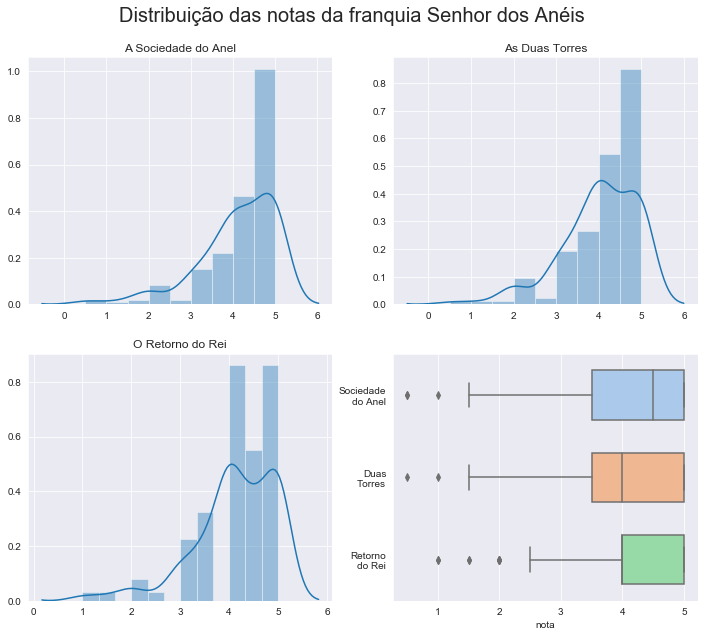

In [67]:
f, axes = plt.subplots(2, 2, figsize=(12,10))
ax1 = sns.distplot(df_notas_franquias.query(f"filmeId == {IDs_f1[0]}")["nota"], ax = axes[0,0])
ax2 = sns.distplot(df_notas_franquias.query(f"filmeId == {IDs_f1[1]}")["nota"], ax = axes[0,1])
ax3 = sns.distplot(df_notas_franquias.query(f"filmeId == {IDs_f1[2]}")["nota"], ax = axes[1,0])
ax4 = sns.boxplot(data = df_notas_franquias, x = df_notas_franquias["nota"] , ax = axes[1,1], 
                 y = df_notas_franquias.rename(index = renomear_boxplot).index, width = 0.6, 
                 orient = "h", palette = "pastel")

ax1.set_title("A Sociedade do Anel")
ax1.set_xlabel("")
ax2.set_title("As Duas Torres")
ax2.set_xlabel("")
ax3.set_title("O Retorno do Rei")
ax3.set_xlabel("")
ax4.set_ylabel("")

f.suptitle('Distribuição das notas da franquia Senhor dos Anéis',fontsize = 20, y = 0.95)

plt.show()

### Através da composição de gráficos acima podemos notar que esta franquia específica de filmes conseguiu manter um padrão de notas. Visualmente podemos concluir que as medianas variam de 4,5, no primeiro filme, à 4 nos dois últimos filmes da franquia, notas próximas da máxima. 
### Também notamos que há valores considerados outliers nos três casos observados, porém nesse caso específico tais valores não são negativos para nossa análise, já que estamos lidando com valores limitados à uma escala específica e todas as notas estão dentro dessa escala.